# Strapdown integration accuracy of C implementation.

### Refence strapdown test vector.
tests\simple_strapdown_reference.csv is generated using ```reference_strapdown_integration.ipynb```

### C imlementation
Running the ``process_strapdown_integration.exe`` generates the tests\strapdown_computed_with_c.csv


This notebook reads in the file and computes the accuracy of the C implementation.

In [72]:
%load_ext autoreload
%autoreload 2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kinematics import synthetic_signals, algebra as kinalg


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read file 

In [73]:
fpath_c = r'..\tests\strapdown_computed_with_c.csv'
df_c = pd.read_csv(fpath_c)
df_c.columns = [ch.strip() for ch in df_c.columns]
df_c.head()

,t,q_ref_w,q_ref_x,q_ref_y,q_ref_z,q_ls_w,q_ls_x,q_ls_y,q_ls_z
0,0.0012,0.707150,0.011106,0.706976,0.000001,0.707194,0.011107,0.707020,0.000001
1,0.0025,0.707194,0.022209,0.706671,0.000002,0.707281,0.022211,0.706758,0.000002
2,0.0037,0.707238,0.033306,0.706191,0.000004,0.707368,0.033311,0.706322,0.000004
3,0.0050,0.707281,0.044394,0.705537,0.000007,0.707456,0.044403,0.705711,0.000007
4,0.0063,0.707325,0.055470,0.704709,0.000010,0.707543,0.055485,0.704927,0.000010


Text(1, 0, 'Time (s)')

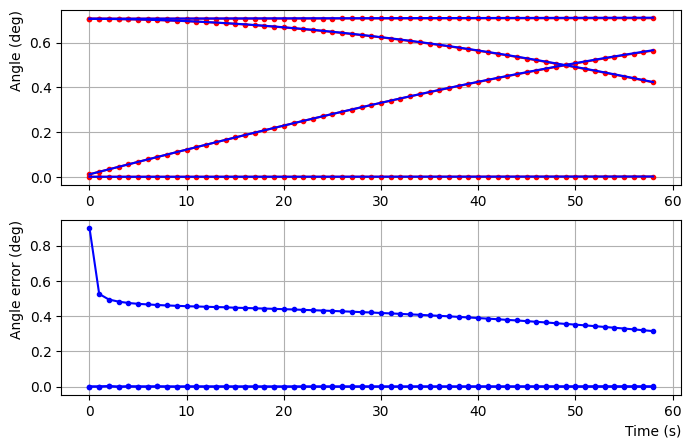

In [74]:
q_ref_array = df_c[[ch for ch in df_c.columns if ch.startswith('q_ref')]]
q_c_array = df_c[[ch for ch in df_c.columns if ch.startswith('q_ls')]]
e_ref = kinalg.array_quaternion_to_euler(q_ref_array.values)
e_c = kinalg.array_quaternion_to_euler(q_c_array.values)

_, axs = plt.subplots(2, 1, figsize=(8, 5))
axs[0].grid()
axs[0].set_ylabel('Angle (deg)', loc='top')	

# axs[0].plot(e_ref, color='red', marker='.')
# axs[0].plot(e_c, color='blue')
axs[0].plot(q_ref_array, color='red', marker='.')
axs[0].plot(q_c_array, color='blue')

axs[1].grid()
axs[1].plot(e_c-e_ref, color='blue', marker='.')	
axs[1].set_ylabel('Angle error (deg)', loc='top')	
axs[1].set_xlabel('Time (s)', loc='right')	


In [75]:
d_c = kinalg.array_get_quat_length(q_c_array.values)
d_ref = kinalg.array_get_quat_length(q_ref_array.values)


d_c, d_ref

(array([1.000062  , 1.0001233 , 1.00018492, 1.00024679, 1.00030883,
        1.00037023, 1.00043223, 1.00049391, 1.00055524, 1.00061717,
        1.00067819, 1.00074081, 1.00080173, 1.00086432, 1.00092591,
        1.00098708, 1.00104905, 1.00111097, 1.00117227, 1.00123466,
        1.00129658, 1.0013583 , 1.00141909, 1.00148148, 1.00154345,
        1.00160508, 1.00166726, 1.00172843, 1.00179031, 1.00185232,
        1.00191349, 1.00197582, 1.00203757, 1.00209898, 1.00216128,
        1.00222244, 1.00228487, 1.00234694, 1.00240899, 1.00247048,
        1.00253229, 1.00259347, 1.00265586, 1.00271703, 1.00277979,
        1.00284128, 1.00290319, 1.00296529, 1.00302667, 1.00308859,
        1.0031511 , 1.00321249, 1.00327423, 1.00333602, 1.00339822,
        1.00346044, 1.00352174, 1.00358341, 1.00364592]),
 array([0.99999977, 1.00000025, 1.0000003 , 0.99999985, 1.00000018,
        0.99999977, 0.99999979, 1.00000016, 0.99999985, 1.00000018,
        0.99999993, 1.00000025, 0.99999948, 1.        , 0.